# BAMS 503 Simulation modeling 1
## Assignment 2, Question 1
## Huy Nguyen, Jatin Sherma, Mariia Karibova, Shreya Verma

## 1. Set up parameters, supporting functions, random seed

In [29]:
import numpy as np  
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
from scipy.stats import truncnorm
from datetime import datetime,timedelta
# Function to get a rondom number from a truncated normal distribution
# Reference for truncated normal distribution: https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy
np.random.seed(123)
trunc_norm = lambda mean, sd, a, b: truncnorm.rvs((a - mean)/sd, (b - mean)/sd, loc = mean, scale=sd)

## 2. Examine the distribution of the random factors

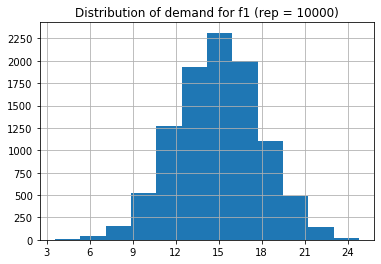

In [30]:
ax = plt.axes()
dist1 = [trunc_norm(15,3,0,25) for i in range(10000)]
plt.hist(dist1,bins = 12)
plt.grid()
plt.title('Distribution of demand for f1 (rep = 10000)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

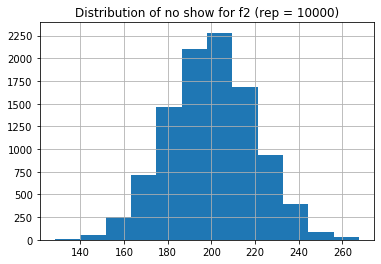

In [31]:
ax = plt.axes()
dist2 = [trunc_norm(200,20,0,300) for i in range(10000)]
plt.hist(dist2,bins = 12)
plt.grid()
plt.title('Distribution of no show for f2 (rep = 10000)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

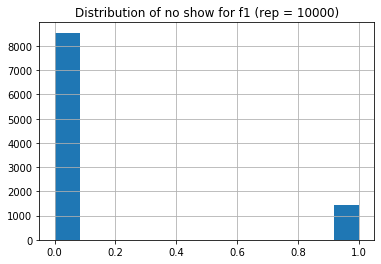

In [32]:
distn1 = [np.random.binomial(1,0.15) for i in range(10000)]
plt.hist(distn1,bins = 12)
plt.grid()
plt.title('Distribution of no show for f1 (rep = 10000)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

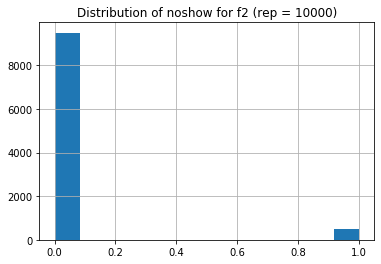

In [33]:
distn1 = [np.random.binomial(1,0.05) for i in range(10000)]
plt.hist(distn1,bins = 12)
plt.grid()
plt.title('Distribution of noshow for f2 (rep = 10000)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

## 3. Simulation function

In [502]:
def flight(tickets = 150, reserved = 0):
    capacity = 150
    s2 = tickets - reserved # tickets available for f2
    d2 = round(trunc_norm(200,20,0,300)) # demand for f2
    sales2 = min(s2,d2) # tickets f2 sold 
    s1 = tickets - min(s2,d2) # tickets available for f1
    d1 = round(trunc_norm(15,3,0,25)) # demand for f1
    sales1 = min(s1,d1) # tickets f1 sold
    total_revenue = sales2*500 + sales1*1500 # total revenue
  
    noshow1 = round(np.random.binomial(sales1,0.15)) # no shows for f1
    noshow2 = round(np.random.binomial(sales2,0.05)) # no shows for f2
    refund = noshow1*1500
    boarding = sales1 + sales2 - noshow1 - noshow2 # number of passengers showing up
    cost = 0
    if boarding > capacity: # Overbooking cost
        overbooking = boarding - capacity
        volunteers = round(np.random.binomial(overbooking, 680/8000))
        if volunteers < overbooking:
            forced = overbooking - volunteers
        else:
            forced = 0
        cost = volunteers*800 + forced*2000
    net_revenue = total_revenue - cost - refund # Net revenue after overbooking cost and refund
    return net_revenue
results = pd.DataFrame({'tickets': [],
                        'reserved': [],
                        'net_revenue': [],
                        'std': []})

## 4. Run the simulations and record the results

In [503]:
start_exe = datetime.now()
for tickets in range(150,211):
    for reserved in range(0,31):
        net_revenue = [flight(tickets,reserved) for i in range(1000)]
        df = pd.DataFrame({'tickets': [tickets],
                           'reserved': [reserved],
                           'net_revenue': [round(np.mean(net_revenue))],
                           'std': [np.std(net_revenue)]
                          })
        results = results.append(df,ignore_index = True)
print(f'\n\nExecution time: {round((datetime.now() - start_exe).total_seconds(),2)}s') # Show execution time
results.sort_values('net_revenue',ascending=False,).head(n=10)



Execution time: 391.67s


,tickets,reserved,net_revenue,std
456,164.0,22.0,89088.0,3581.592696
711,172.0,29.0,89078.0,3361.863732
712,172.0,30.0,89076.0,3506.309262
616,169.0,27.0,89041.0,3586.828543
615,169.0,26.0,89039.0,3638.808254
391,162.0,19.0,89009.0,3481.432796
584,168.0,26.0,88991.0,3705.648973
679,171.0,28.0,88981.0,3384.887537
552,167.0,25.0,88964.0,3556.872784
743,173.0,30.0,88932.0,3734.950602


## Answers
### Part a. and b. Investigate the effect of decision making

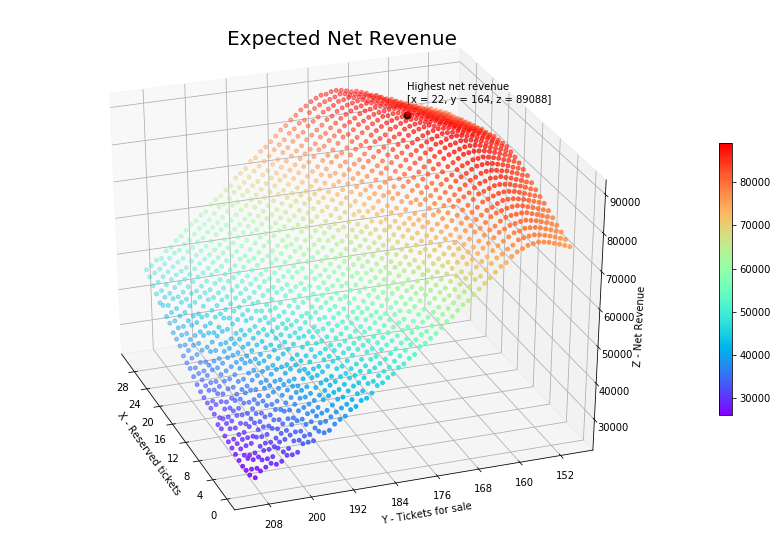

In [504]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
z_points = results['net_revenue']
x_points = results['reserved']
y_points = results['tickets']
z_max = int(max(results['net_revenue']))
x_max = int(results[results['net_revenue'] == z_max]['reserved'])
y_max = int(results[results['net_revenue'] == z_max]['tickets'])
ax.text(x_max,y_max,z_max+6500, 'Highest net revenue')
ax.text(x_max,y_max,z_max+3200, f'[x = {x_max}, y = {y_max}, z = {z_max}]')
t = ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='rainbow',s = 15)
plt.colorbar(t, shrink = 0.5)
ax.scatter3D(x_max,y_max,z_max,c = 'black', s = 50,)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('X - Reserved tickets')
ax.set_ylabel('Y - Tickets for sale')
ax.set_zlabel('Z - Net Revenue')
ax.grid(True)
plt.title(label = 'Expected Net Revenue', fontsize = 20)
# rotate the axes and update
ax.view_init(30,160)
plt.draw()


### Part a. and b. (continued)

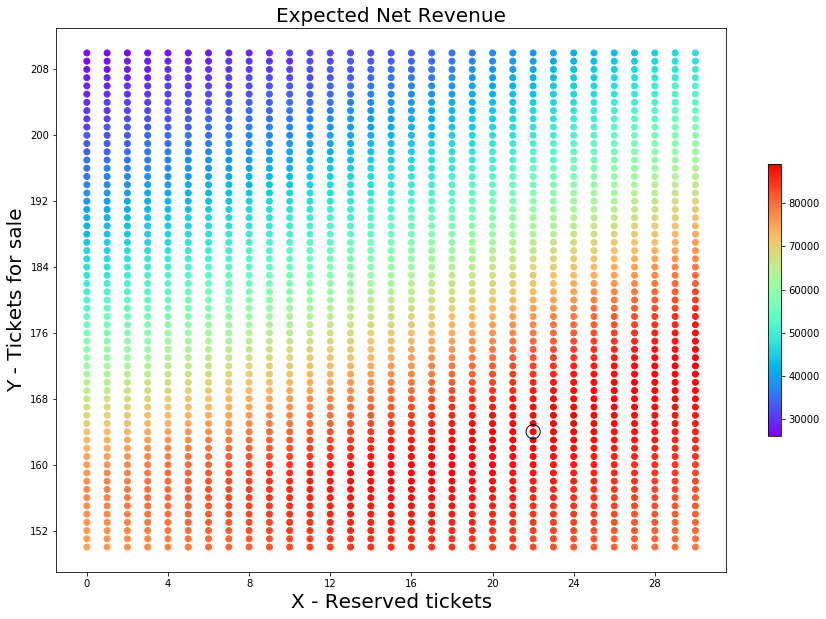

In [505]:
fig = plt.figure(figsize=(15,10))
z_points = results['net_revenue']
x_points = results['reserved']
y_points = results['tickets']
z_max = int(max(results['net_revenue']))
x_max = int(results[results['net_revenue'] == z_max]['reserved'])
y_max = int(results[results['net_revenue'] == z_max]['tickets'])
ax = plt.axes()
plt.title(label = 'Expected Net Revenue', fontsize = 20)
plt.scatter(x_points,y_points,c=z_points,cmap='rainbow')
plt.colorbar(shrink = 0.5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('X - Reserved tickets', fontsize = 20)
ax.set_ylabel('Y - Tickets for sale', fontsize = 20)
plt.scatter(x_max, y_max, c='none', cmap='rainbow',s = 200,marker = 'o',edgecolors = 'black',)
plt.show()

### Part c. 
#### Case 1: Overbooking allowed, no reserved seats for f1

     tickets  reserved  net_revenue          std
186    156.0       0.0      77427.0  1698.382969
155    155.0       0.0      77225.0  1248.108569
217    157.0       0.0      77214.0  2428.978872
248    158.0       0.0      76969.0  3199.372382
124    154.0       0.0      76944.0   951.801639
93     153.0       0.0      76491.0   721.478787
279    159.0       0.0      76328.0  3625.840349
62     152.0       0.0      76042.0   581.831376
310    160.0       0.0      75699.0  4066.687634
31     151.0       0.0      75541.0   535.554852


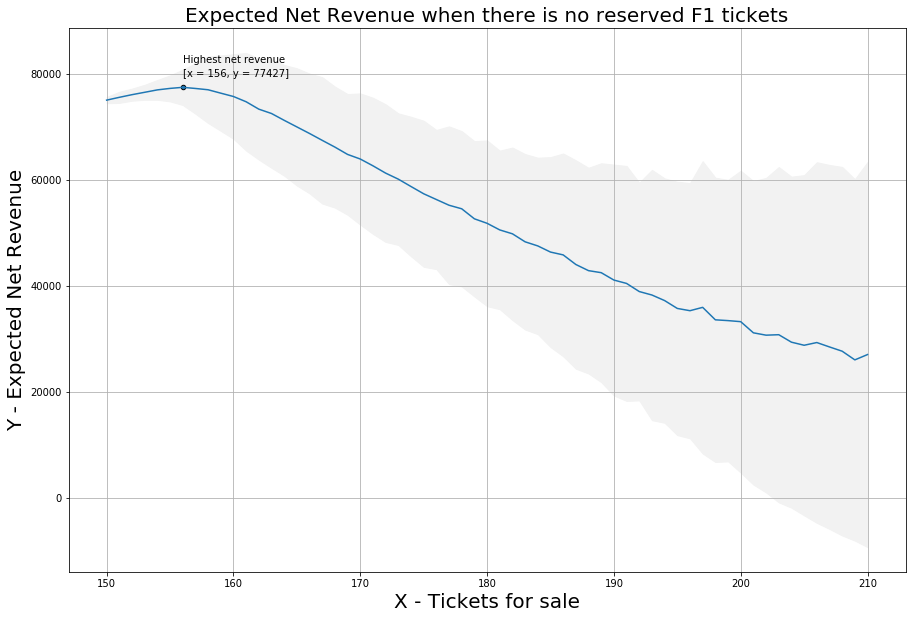

In [506]:
fig = plt.figure(figsize=(15,10))
case1 = results[results['reserved'] == 0]
print(case1.sort_values('net_revenue',ascending=False,).head(n = 10))
ax = plt.axes()
y_points = case1['net_revenue']
x_points = case1['tickets']
plt.title(label = 'Expected Net Revenue when there is no reserved F1 tickets', fontsize = 20)
# plt.plot(x_points,y_points)
ax.fill_between(x_points,y_points - 1.96*case1['std'], y_points + 1.96*case1['std'],color='0.95')
ax.plot(x_points,y_points)
ax.set_xlabel('X - Tickets for sale', fontsize = 20)
ax.set_ylabel('Y - Expected Net Revenue', fontsize = 20)
y_max = int(max(case1['net_revenue']))
x_max = int(case1[case1['net_revenue'] == y_max]['tickets'])
plt.scatter(x_max, y_max, cmap='rainbow',s = 20,edgecolors = 'black',)
ax.text(x_max,y_max+4500, 'Highest net revenue')
ax.text(x_max,y_max+2000, f'[x = {x_max}, y = {y_max}]')
plt.grid()
plt.show()

#### Case 2: Overbooking not allowed, reserved seats for f1

    tickets  reserved  net_revenue          std
15    150.0      15.0      85194.0  2941.830043
16    150.0      16.0      85076.0  3321.204262
17    150.0      17.0      84929.0  3776.964257
14    150.0      14.0      84844.0  2622.607433
18    150.0      18.0      84836.0  3916.336266
13    150.0      13.0      84536.0  2369.581767
19    150.0      19.0      84262.0  4111.733941
12    150.0      12.0      83998.0  2110.153490
20    150.0      20.0      83909.0  4227.968661
21    150.0      21.0      83722.0  4256.083147


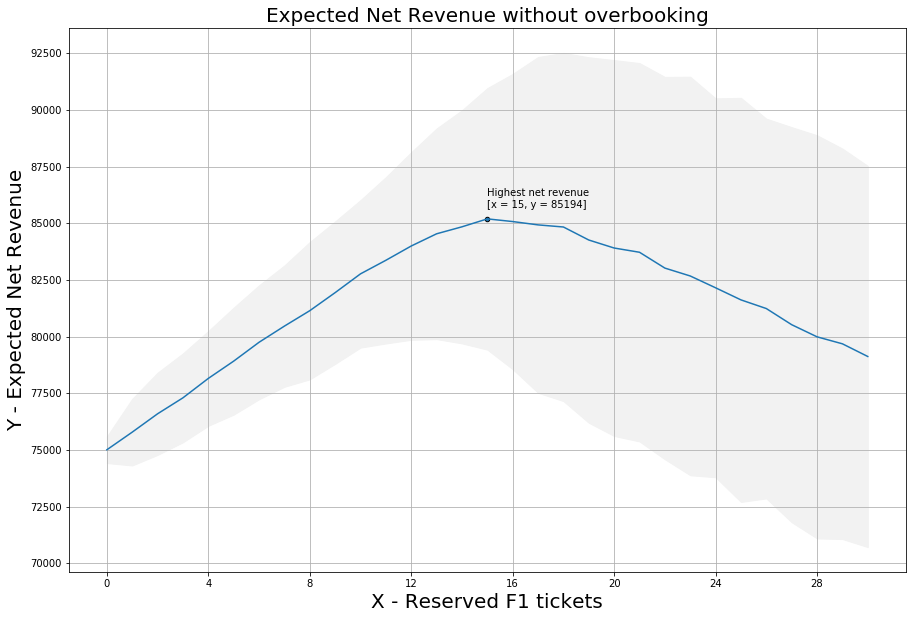

In [507]:
fig = plt.figure(figsize=(15,10))
case2 = results[results['tickets'] == 150]
print(case2.sort_values('net_revenue',ascending=False,).head(n = 10))
ax = plt.axes()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
y_points = case2['net_revenue']
x_points = case2['reserved']
plt.title(label = 'Expected Net Revenue without overbooking', fontsize = 20)
ax.fill_between(x_points,y_points - 1.96*case2['std'], y_points + 1.96*case2['std'],color='0.95')
ax.set_xlabel('X - Reserved F1 tickets', fontsize = 20)
ax.set_ylabel('Y - Expected Net Revenue', fontsize = 20)
y_max = int(max(case2['net_revenue']))
x_max = int(case2[case2['net_revenue'] == y_max]['reserved'])
plt.scatter(x_max, y_max, cmap='rainbow',s = 20,edgecolors = 'black',)
ax.text(x_max,y_max+1000, 'Highest net revenue')
ax.text(x_max,y_max+500, f'[x = {x_max}, y = {y_max}]')
plt.plot(x_points,y_points)
plt.grid()
plt.show()